In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os
import re

In [ ]:


def analyze_single_file(filepath):
    """
    Loads a single CSV, calculates statistics, prints a report, 
    and returns the stats dictionary.
    """
    df = pd.read_csv(filepath,index_col=0)

    total_runs = len(df)
    
    num_solved = df['Is_Valid'].sum() if 'Is_Valid' in df.columns else 0
    solved_rate = (num_solved / total_runs) * 100
    
    num_optimal = df["Success"].sum()

    optimal_rate = (num_optimal / total_runs) * 100

    avg_steps = df['Steps'].mean()
    avg_time = df['Time'].mean()
    avg_error = df['Rel_Error'].mean() * 100

    stats = {
        "Filename": os.path.basename(filepath),
        "Runs": total_runs,
        "Solved Rate": solved_rate,
        "Optimal Rate": optimal_rate,
        "Avg Steps": avg_steps,
        "Avg Time": avg_time,
        "Avg Rel Error": avg_error
    }

    print(f"--- Analysis: {os.path.basename(filepath)} ---")
    print(f"Total Runs:    {total_runs}")
    print(f"Feasible:      {num_solved} ({solved_rate:.2f}%)")
    print(f"Optimal:       {num_optimal} ({optimal_rate:.2f}%)")
    print(f"Avg Time:      {avg_time:.4f} s")
    print(f"Avg Steps:     {avg_steps:.1f}")
    print(f"Avg Error:     {avg_error:.4f}%")
    print("-" * 40 + "\n")
    
    return stats

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

def compare_experiments(file_list, title="Comparison of Weight Distributions"):
    """
    Takes a list of filenames, aggregates data, and plots comparative charts in a 2x2 grid.
    Expected filenames: "wuf-50-218-Q.csv" (or similar ending in WeightType.csv)
    """
    all_stats = []
    
    for f in file_list:
        stats = analyze_single_file(f)
        
        if stats:

            filename_no_ext = os.path.splitext(os.path.basename(f))[0]
            weight_type = filename_no_ext.split("-")[-1]
            
            stats['Weight Type'] = weight_type
            all_stats.append(stats)
            
    if not all_stats:
        print("No data collected.")
        return

    compare_df = pd.DataFrame(all_stats)
    
    compare_df.sort_values('Weight Type', inplace=True)

    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()
    
    melted = compare_df.melt(id_vars=['Weight Type'], 
                             value_vars=['Solved Rate', 'Optimal Rate'], 
                             var_name='Metric', value_name='Percentage')
    
    sns.barplot(x='Weight Type', y='Percentage', hue='Metric', data=melted, ax=axes[0], palette="Blues_d")
    axes[0].set_title("Success Rates (Validity vs Optimality)")
    axes[0].set_ylim(0, 105)
    axes[0].set_ylabel("Percentage (%)")
    axes[0].grid(axis='y', linestyle='--', alpha=0.5)
    axes[0].legend(loc='lower right')

    sns.barplot(x='Weight Type', y='Avg Time', data=compare_df, ax=axes[1], palette="Reds_d")
    axes[1].set_title("Computational Cost (Time)")
    axes[1].set_ylabel("Average Time (s)")
    axes[1].grid(axis='y', linestyle='--', alpha=0.5)

    sns.barplot(x='Weight Type', y='Avg Steps', data=compare_df, ax=axes[2], palette="Greens_d")
    axes[2].set_title("Search Effort (Steps)")
    axes[2].set_ylabel("Average Steps")
    axes[2].grid(axis='y', linestyle='--', alpha=0.5)

    if 'Avg Rel Error' in compare_df.columns:
        sns.barplot(x='Weight Type', y='Avg Rel Error', data=compare_df, ax=axes[3], palette="Oranges_d")
        axes[3].set_title("Approximation Error (Lower is Better)")
        axes[3].set_ylabel("Avg Relative Error (%)")
        axes[3].grid(axis='y', linestyle='--', alpha=0.5)
    else:
        axes[3].text(0.5, 0.5, "No Rel Error Data", ha='center')

    plt.suptitle(f"{title}", fontsize=16, y=0.98)
    plt.tight_layout(rect=[0, 0.03, 1, 0.98]) 
    plt.show()

In [74]:
analyze_single_file("wuf20-91-M")

--- Analysis: wuf20-91-M ---
Total Runs:    100000
Feasible:      98003 (98.00%)
Optimal:       97613 (97.61%)
Avg Time:      0.4507 s
Avg Steps:     74120.2
Avg Error:     2.0638%
----------------------------------------



{'Filename': 'wuf20-91-M',
 'Runs': 100000,
 'Solved Rate': np.float64(98.003),
 'Optimal Rate': np.float64(97.613),
 'Avg Steps': np.float64(74120.1552),
 'Avg Time': np.float64(0.4506740283584595),
 'Avg Rel Error': np.float64(2.063783296911417)}

In [61]:
analyze_single_file("wuf20-91-N")

--- Analysis: wuf20-91-N ---
Total Runs:    100000
Feasible:      98029 (98.03%)
Optimal:       97655 (97.66%)
Avg Time:      0.4511 s
Avg Steps:     74125.9
Avg Error:     2.0308%
----------------------------------------



{'Filename': 'wuf20-91-N',
 'Runs': 100000,
 'Solved Rate': np.float64(98.029),
 'Optimal Rate': np.float64(97.655),
 'Avg Steps': np.float64(74125.9428),
 'Avg Time': np.float64(0.4510631637454033),
 'Avg Rel Error': np.float64(2.0307762512891796)}

In [62]:
analyze_single_file("wuf20-91-R")

--- Analysis: wuf20-91-R ---
Total Runs:    100000
Feasible:      98011 (98.01%)
Optimal:       97504 (97.50%)
Avg Time:      0.4119 s
Avg Steps:     74144.3
Avg Error:     2.1503%
----------------------------------------



{'Filename': 'wuf20-91-R',
 'Runs': 100000,
 'Solved Rate': np.float64(98.01100000000001),
 'Optimal Rate': np.float64(97.504),
 'Avg Steps': np.float64(74144.2884),
 'Avg Time': np.float64(0.41192503361940386),
 'Avg Rel Error': np.float64(2.1503308654963105)}

In [63]:
analyze_single_file("wuf20-91-Q")

--- Analysis: wuf20-91-Q ---
Total Runs:    100000
Feasible:      98070 (98.07%)
Optimal:       97527 (97.53%)
Avg Time:      0.4511 s
Avg Steps:     74141.1
Avg Error:     2.1018%
----------------------------------------



{'Filename': 'wuf20-91-Q',
 'Runs': 100000,
 'Solved Rate': np.float64(98.07000000000001),
 'Optimal Rate': np.float64(97.527),
 'Avg Steps': np.float64(74141.10704),
 'Avg Time': np.float64(0.4511344851374626),
 'Avg Rel Error': np.float64(2.101786882112107)}

In [64]:
analyze_single_file("wuf-50-218-M")

--- Analysis: wuf-50-218-M ---
Total Runs:    100000
Feasible:      99217 (99.22%)
Optimal:       97776 (97.78%)
Avg Time:      1.2577 s
Avg Steps:     211560.1
Avg Error:     0.8190%
----------------------------------------



{'Filename': 'wuf-50-218-M',
 'Runs': 100000,
 'Solved Rate': np.float64(99.217),
 'Optimal Rate': np.float64(97.776),
 'Avg Steps': np.float64(211560.07072),
 'Avg Time': np.float64(1.2576625417900085),
 'Avg Rel Error': np.float64(0.8190077557986792)}

In [65]:
analyze_single_file("wuf-50-218-N")

--- Analysis: wuf-50-218-N ---
Total Runs:    100000
Feasible:      99231 (99.23%)
Optimal:       97750 (97.75%)
Avg Time:      1.2639 s
Avg Steps:     211596.9
Avg Error:     0.8052%
----------------------------------------



{'Filename': 'wuf-50-218-N',
 'Runs': 100000,
 'Solved Rate': np.float64(99.23100000000001),
 'Optimal Rate': np.float64(97.75),
 'Avg Steps': np.float64(211596.92144),
 'Avg Time': np.float64(1.2639326890707017),
 'Avg Rel Error': np.float64(0.8052130022326598)}

In [66]:
analyze_single_file("wuf-50-218-R")

--- Analysis: wuf-50-218-R ---
Total Runs:    100000
Feasible:      99172 (99.17%)
Optimal:       93508 (93.51%)
Avg Time:      1.2573 s
Avg Steps:     210362.5
Avg Error:     1.4489%
----------------------------------------



{'Filename': 'wuf-50-218-R',
 'Runs': 100000,
 'Solved Rate': np.float64(99.17200000000001),
 'Optimal Rate': np.float64(93.508),
 'Avg Steps': np.float64(210362.46592),
 'Avg Time': np.float64(1.2572603029942513),
 'Avg Rel Error': np.float64(1.4489416528808006)}

In [67]:
analyze_single_file("wuf-50-218-Q")

--- Analysis: wuf-50-218-Q ---
Total Runs:    100000
Feasible:      99200 (99.20%)
Optimal:       93385 (93.38%)
Avg Time:      1.1485 s
Avg Steps:     210377.1
Avg Error:     1.4264%
----------------------------------------



{'Filename': 'wuf-50-218-Q',
 'Runs': 100000,
 'Solved Rate': np.float64(99.2),
 'Optimal Rate': np.float64(93.38499999999999),
 'Avg Steps': np.float64(210377.0632),
 'Avg Time': np.float64(1.1485220641613008),
 'Avg Rel Error': np.float64(1.4264278485269328)}

In [68]:
analyze_single_file("wuf-75-325-M")

--- Analysis: wuf-75-325-M ---
Total Runs:    5000
Feasible:      4971 (99.42%)
Optimal:       4368 (87.36%)
Avg Time:      2.2328 s
Avg Steps:     360018.9
Avg Error:     0.7443%
----------------------------------------



{'Filename': 'wuf-75-325-M',
 'Runs': 5000,
 'Solved Rate': np.float64(99.42),
 'Optimal Rate': np.float64(87.36),
 'Avg Steps': np.float64(360018.88),
 'Avg Time': np.float64(2.2328188414096832),
 'Avg Rel Error': np.float64(0.744301865096401)}

In [69]:
analyze_single_file("wuf-75-325-N")

--- Analysis: wuf-75-325-N ---
Total Runs:    5000
Feasible:      4971 (99.42%)
Optimal:       4356 (87.12%)
Avg Time:      2.2201 s
Avg Steps:     359912.3
Avg Error:     0.7223%
----------------------------------------



{'Filename': 'wuf-75-325-N',
 'Runs': 5000,
 'Solved Rate': np.float64(99.42),
 'Optimal Rate': np.float64(87.12),
 'Avg Steps': np.float64(359912.28),
 'Avg Time': np.float64(2.2201492534637453),
 'Avg Rel Error': np.float64(0.7222969639506625)}

In [105]:
analyze_single_file("wuf-75-325-R")

--- Analysis: wuf-75-325-R ---
Total Runs:    5000
Feasible:      4935 (98.70%)
Optimal:       4168 (83.36%)
Avg Time:      2.1625 s
Avg Steps:     348426.5
Avg Error:     3.2534%
----------------------------------------



{'Filename': 'wuf-75-325-R',
 'Runs': 5000,
 'Solved Rate': np.float64(98.7),
 'Optimal Rate': np.float64(83.36),
 'Avg Steps': np.float64(348426.52),
 'Avg Time': np.float64(2.1625370688915253),
 'Avg Rel Error': np.float64(3.25340776836362)}

In [104]:
analyze_single_file("wuf-75-325-Q")

--- Analysis: wuf-75-325-Q ---
Total Runs:    5000
Feasible:      4935 (98.70%)
Optimal:       4109 (82.18%)
Avg Time:      2.1679 s
Avg Steps:     348264.8
Avg Error:     3.1740%
----------------------------------------



{'Filename': 'wuf-75-325-Q',
 'Runs': 5000,
 'Solved Rate': np.float64(98.7),
 'Optimal Rate': np.float64(82.17999999999999),
 'Avg Steps': np.float64(348264.8),
 'Avg Time': np.float64(2.167880564594269),
 'Avg Rel Error': np.float64(3.174029091013207)}

--- Analysis: wuf-75-325-N ---
Total Runs:    5000
Feasible:      4971 (99.42%)
Optimal:       4356 (87.12%)
Avg Time:      2.2201 s
Avg Steps:     359912.3
Avg Error:     0.7223%
----------------------------------------

--- Analysis: wuf-75-325-Q ---
Total Runs:    5000
Feasible:      4935 (98.70%)
Optimal:       4109 (82.18%)
Avg Time:      2.1679 s
Avg Steps:     348264.8
Avg Error:     3.1740%
----------------------------------------

--- Analysis: wuf-75-325-M ---
Total Runs:    5000
Feasible:      4971 (99.42%)
Optimal:       4368 (87.36%)
Avg Time:      2.2328 s
Avg Steps:     360018.9
Avg Error:     0.7443%
----------------------------------------

--- Analysis: wuf-75-325-R ---
Total Runs:    5000
Feasible:      4935 (98.70%)
Optimal:       4168 (83.36%)
Avg Time:      2.1625 s
Avg Steps:     348426.5
Avg Error:     3.2534%
----------------------------------------



/var/folders/wz/x7xqj0yj6ls_367syhygxjn40000gn/T/ipykernel_78498/3555091760.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weight Type', y='Avg Time', data=compare_df, ax=axes[1], palette="Reds_d")
/var/folders/wz/x7xqj0yj6ls_367syhygxjn40000gn/T/ipykernel_78498/3555091760.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weight Type', y='Avg Steps', data=compare_df, ax=axes[2], palette="Greens_d")
/var/folders/wz/x7xqj0yj6ls_367syhygxjn40000gn/T/ipykernel_78498/3555091760.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot

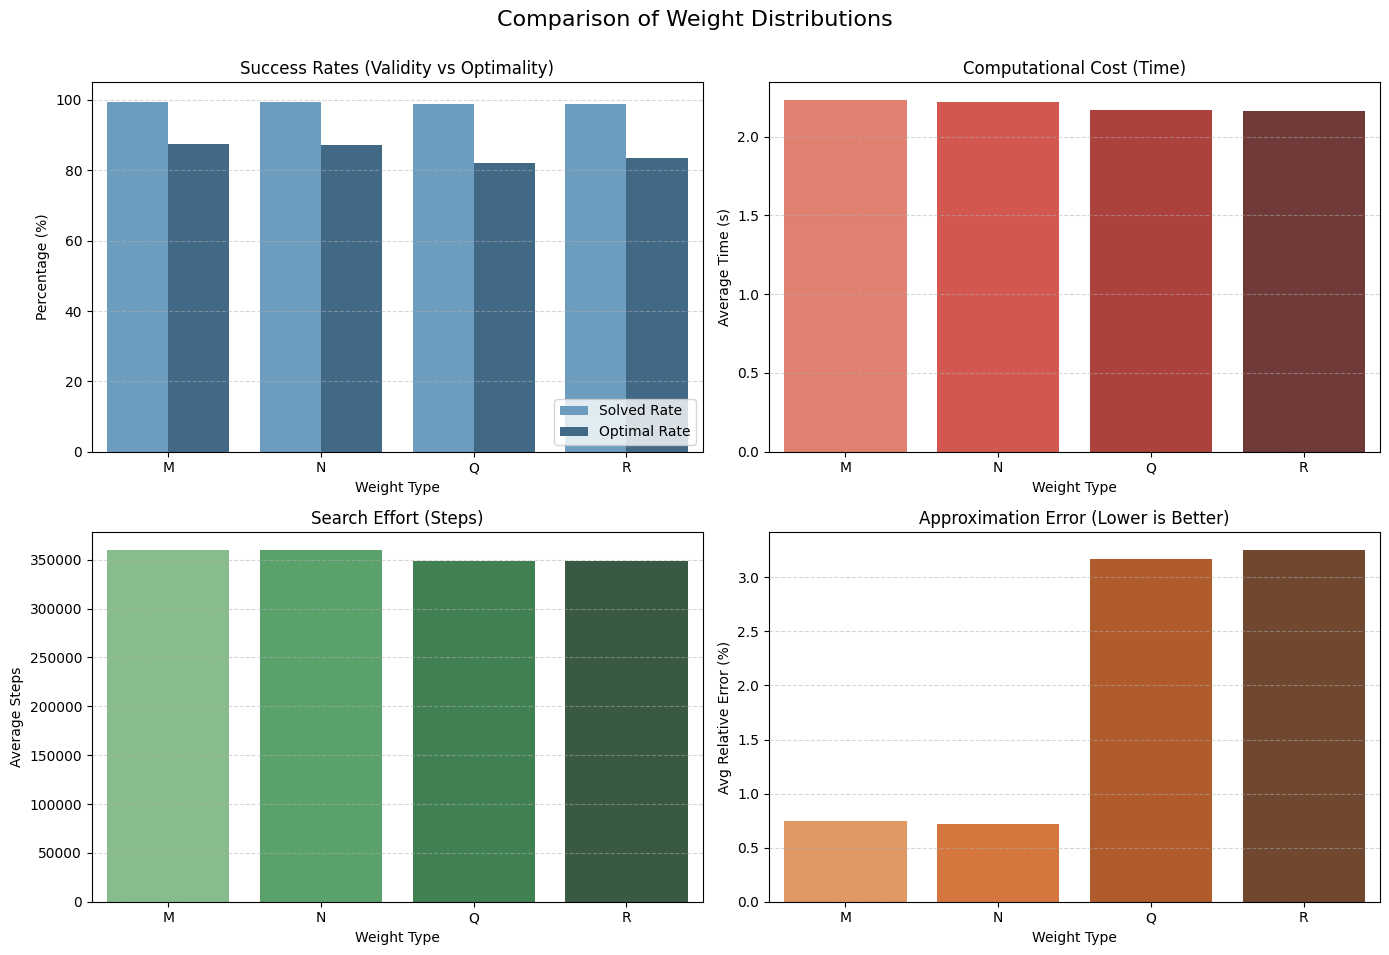

In [110]:
compare_experiments(["wuf-75-325-N","wuf-75-325-Q","wuf-75-325-M","wuf-75-325-R"])

--- Analysis: wuf20-91-N ---
Total Runs:    100000
Feasible:      98029 (98.03%)
Optimal:       97655 (97.66%)
Avg Time:      0.4511 s
Avg Steps:     74125.9
Avg Error:     2.0308%
----------------------------------------

--- Analysis: wuf20-91-Q ---
Total Runs:    100000
Feasible:      98070 (98.07%)
Optimal:       97527 (97.53%)
Avg Time:      0.4511 s
Avg Steps:     74141.1
Avg Error:     2.1018%
----------------------------------------

--- Analysis: wuf20-91-M ---
Total Runs:    100000
Feasible:      98003 (98.00%)
Optimal:       97613 (97.61%)
Avg Time:      0.4507 s
Avg Steps:     74120.2
Avg Error:     2.0638%
----------------------------------------

--- Analysis: wuf20-91-R ---
Total Runs:    100000
Feasible:      98011 (98.01%)
Optimal:       97504 (97.50%)
Avg Time:      0.4119 s
Avg Steps:     74144.3
Avg Error:     2.1503%
----------------------------------------



/var/folders/wz/x7xqj0yj6ls_367syhygxjn40000gn/T/ipykernel_78498/3555091760.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weight Type', y='Avg Time', data=compare_df, ax=axes[1], palette="Reds_d")
/var/folders/wz/x7xqj0yj6ls_367syhygxjn40000gn/T/ipykernel_78498/3555091760.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weight Type', y='Avg Steps', data=compare_df, ax=axes[2], palette="Greens_d")
/var/folders/wz/x7xqj0yj6ls_367syhygxjn40000gn/T/ipykernel_78498/3555091760.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot

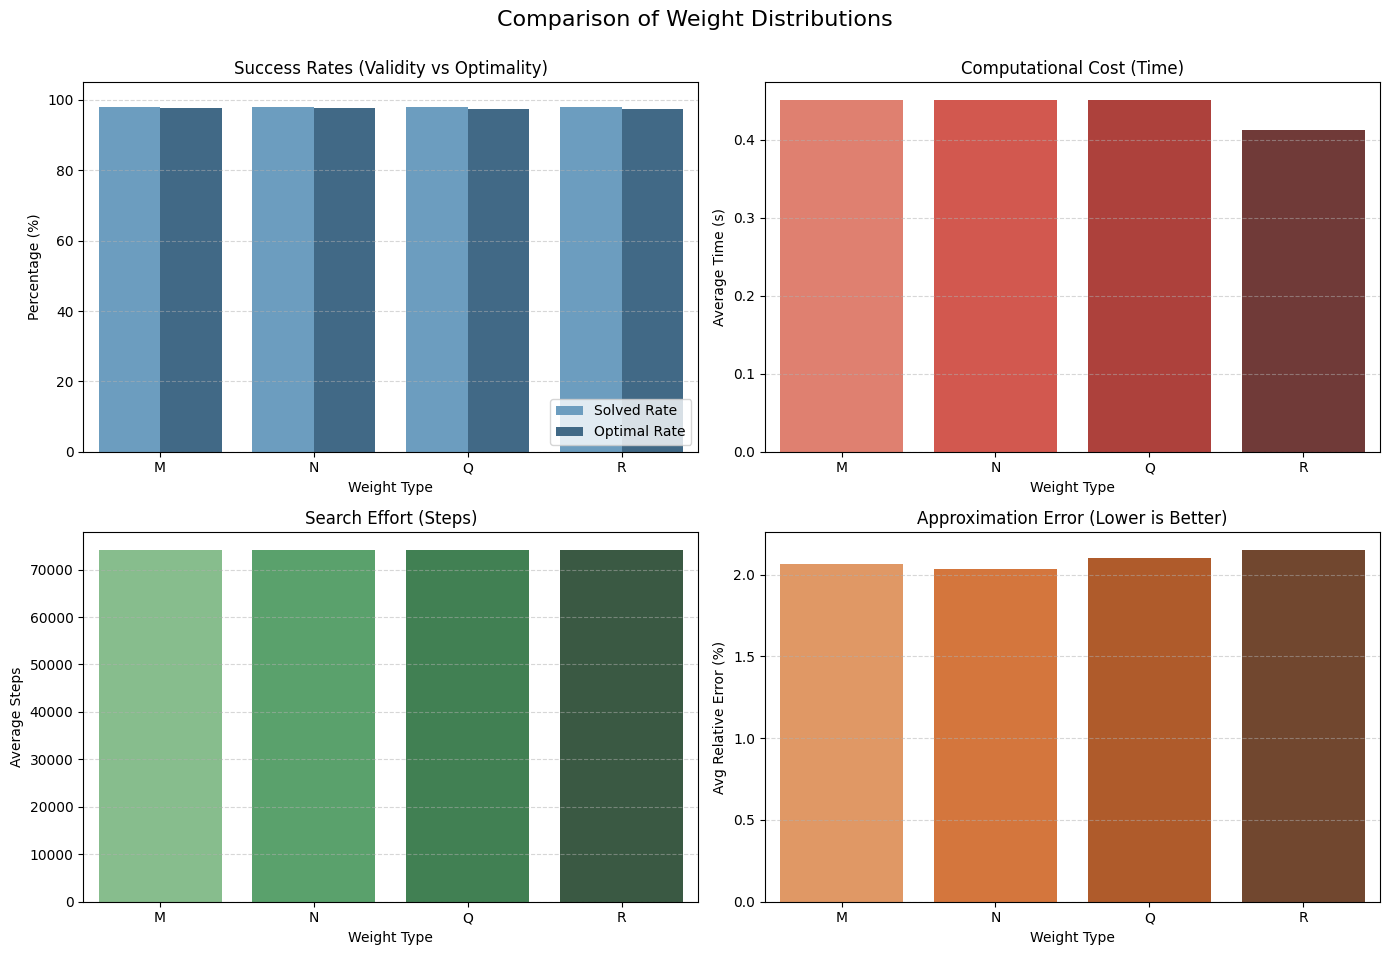

In [111]:
compare_experiments(["wuf20-91-N","wuf20-91-Q","wuf20-91-M","wuf20-91-R"])

--- Analysis: wuf-50-218-N ---
Total Runs:    100000
Feasible:      99231 (99.23%)
Optimal:       97750 (97.75%)
Avg Time:      1.2639 s
Avg Steps:     211596.9
Avg Error:     0.8052%
----------------------------------------

--- Analysis: wuf-50-218-Q ---
Total Runs:    100000
Feasible:      99200 (99.20%)
Optimal:       93385 (93.38%)
Avg Time:      1.1485 s
Avg Steps:     210377.1
Avg Error:     1.4264%
----------------------------------------

--- Analysis: wuf-50-218-M ---
Total Runs:    100000
Feasible:      99217 (99.22%)
Optimal:       97776 (97.78%)
Avg Time:      1.2577 s
Avg Steps:     211560.1
Avg Error:     0.8190%
----------------------------------------

--- Analysis: wuf-50-218-R ---
Total Runs:    100000
Feasible:      99172 (99.17%)
Optimal:       93508 (93.51%)
Avg Time:      1.2573 s
Avg Steps:     210362.5
Avg Error:     1.4489%
----------------------------------------



/var/folders/wz/x7xqj0yj6ls_367syhygxjn40000gn/T/ipykernel_78498/3555091760.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weight Type', y='Avg Time', data=compare_df, ax=axes[1], palette="Reds_d")
/var/folders/wz/x7xqj0yj6ls_367syhygxjn40000gn/T/ipykernel_78498/3555091760.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weight Type', y='Avg Steps', data=compare_df, ax=axes[2], palette="Greens_d")
/var/folders/wz/x7xqj0yj6ls_367syhygxjn40000gn/T/ipykernel_78498/3555091760.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot

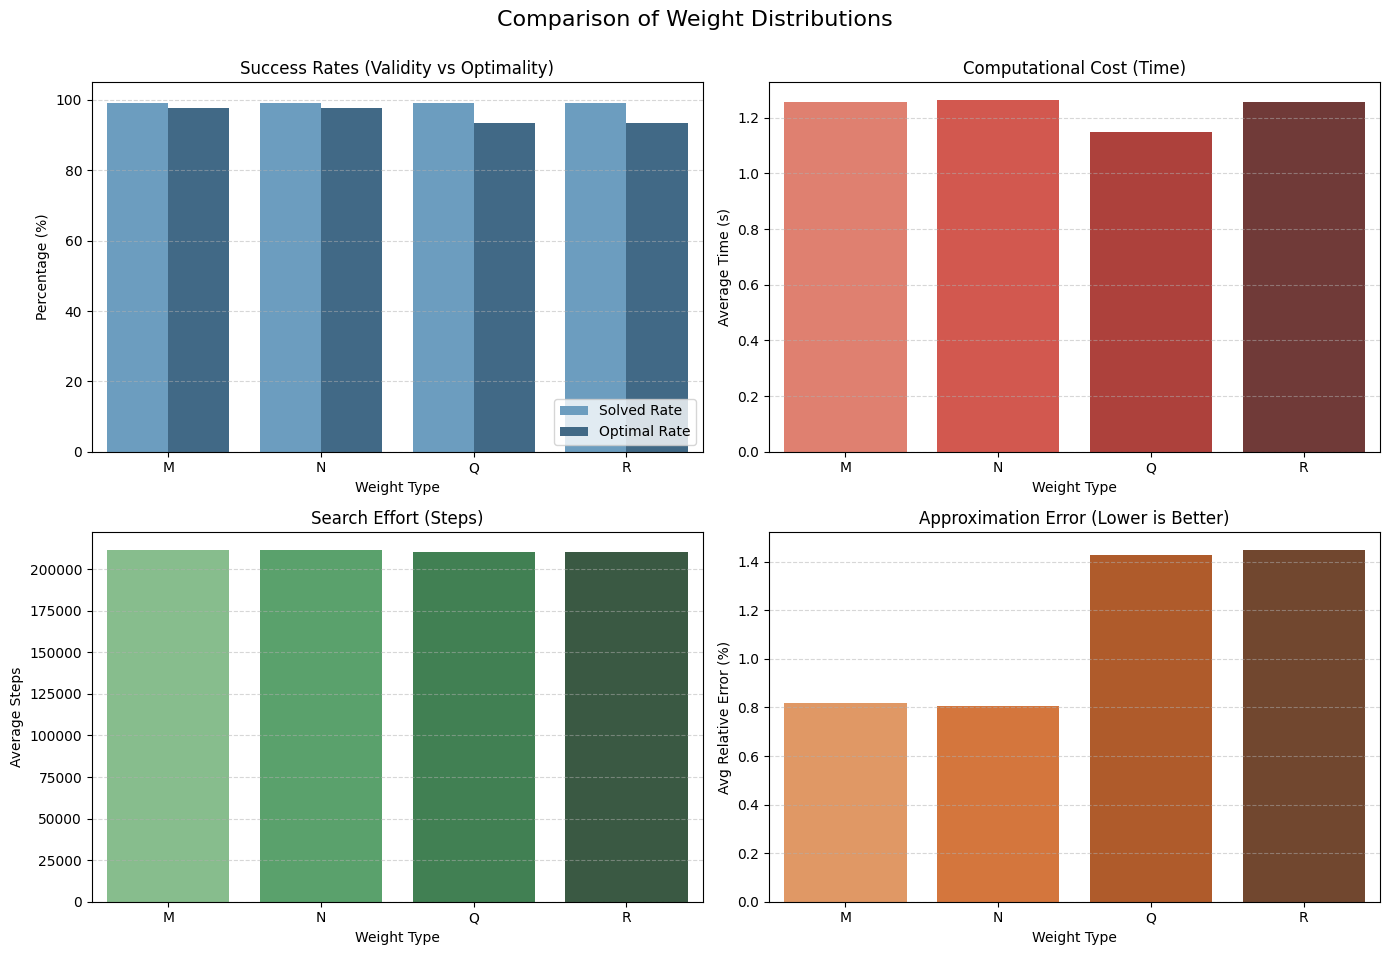

In [112]:
compare_experiments(["wuf-50-218-N","wuf-50-218-Q","wuf-50-218-M","wuf-50-218-R"])